In [2]:
!pip install matplotlib

     |████████████████████████████████| 11.6MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 102kB 57.0MB/s ta 0:00:01
     |████████████████████████████████| 2.2MB 93.7MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

from qiskit import BasicAer
from qiskit.ml.datasets import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import QSVM, VQC
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA

from embed_utils import MyVQC
from var_utils import MyRYRZ

In [2]:
from bc_utils import *

In [6]:
import itertools
num_bits = 6

x_train = []
y_train = []

for comb in itertools.product('01', repeat=num_bits):
    comb = [int(x) for x in comb]
    x_train.append(comb)
    y_train.append(sum(comb) % 2)
#     y_train.append(int(comb[0]))
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [7]:
num_qubit = num_bits // 3
x_st = []
for x in x_train:
    x_st.append(''.join(x.astype(str)))
    
x_st = np.array(x_st)

In [8]:
x_st

array(['000000', '000001', '000010', '000011', '000100', '000101',
       '000110', '000111', '001000', '001001', '001010', '001011',
       '001100', '001101', '001110', '001111', '010000', '010001',
       '010010', '010011', '010100', '010101', '010110', '010111',
       '011000', '011001', '011010', '011011', '011100', '011101',
       '011110', '011111', '100000', '100001', '100010', '100011',
       '100100', '100101', '100110', '100111', '101000', '101001',
       '101010', '101011', '101100', '101101', '101110', '101111',
       '110000', '110001', '110010', '110011', '110100', '110101',
       '110110', '110111', '111000', '111001', '111010', '111011',
       '111100', '111101', '111110', '111111'], dtype='<U6')

In [9]:
from qiskit import QuantumCircuit

In [12]:
num_qubit

2

In [13]:
from quantum_utils import CustomFeatureMap
from qiskit.aqua.components import variational_forms
from qiskit.aqua.components.optimizers import COBYLA, SPSA
from qiskit.providers.aer import QasmSimulator
from qiskit.aqua import QuantumInstance

import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

seed = 10598

vqc_ordinal_log = []
def loss_history_callback(_, __, loss, ___):
    vqc_ordinal_log.append(loss)

feature_map = QuantumCircuit(num_qubit) # Empty Circuit
var_form = MyRYRZ(num_qubit, depth=4)

training_input = {
    0: x_st[y_train == 0],
    1: x_st[y_train == 1]
}

qsvm = MyVQC(SPSA(200), feature_map, var_form, training_input, callback=loss_history_callback)

backend_options = {"method": "statevector_gpu"}
backend = QasmSimulator(backend_options)

quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)


result = qsvm.run(quantum_instance)

y_pred_train = qsvm.predict(x_st)[1]


# F1 score
acc_f1_train = (np.mean(y_pred_train == y_train), f1_score(y_train, y_pred_train))


# qsvm.save_model(f'models/titanic_QRAC_mapped_no13_implementation_fold_{ro}')


<ipython-input-13-25e5443bd16c>:18: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
  var_form = MyRYRZ(num_qubit, depth=4)
<ipython-input-13-25e5443bd16c>:25: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  qsvm = MyVQC(SPSA(200), feature_map, var_form, training_input, callback=loss_history_callback)
/home/napat-nii/qc_group_project/embed_utils.py:545: UserWarning: The feature map has no parameters that can be optimized t

2020-08-24 14:03:19,699:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:20,678:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:21,692:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:22,626:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:23,613:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:23,767:qiskit.aqua.components.optimizers.spsa:DEBUG: calibration step # 15 of 25
2020-08-24 14:03:24,477:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:25,487:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:03:26,332:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the N

2020-08-24 14:04:03,293:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: 0.7341413
2020-08-24 14:04:04,118:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:04:04,979:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:04:05,135:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 11: 0.7597568
2020-08-24 14:04:05,136:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 11: 0.7437831
2020-08-24 14:04:05,958:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:04:06,866:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-24 14:04:07,019:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 12: 0.7457533
2020-08-24 14:04:07,020:qiskit.aqua.componen

  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    se

  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

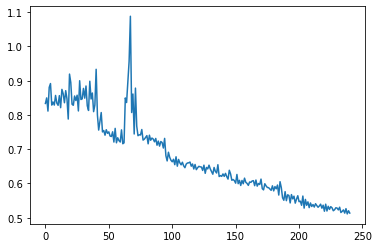

In [46]:
plt.plot(vqc_ordinal_log)

In [30]:
qsvm.construct_circuit('110', np.array([2 for i in range(18)])).draw()

┌─────────────┐┌───────────┐┌───────────┐┌───────┐ ░  ░  ░  ░  ░  ░  ░  ░ »
q_0: ┤ circuit1023 ├┤ U3(2,2,0) ├┤ U3(2,0,0) ├┤ U1(2) ├─░──░──░──░──░──░──░──░─»
     └─────────────┘└───────────┘└───────────┘└───────┘ ░  ░  ░  ░  ░  ░  ░  ░ »
c_0: ══════════════════════════════════════════════════════════════════════════»
                                                                               »
«      ░ 
«q_0: ─░─
«      ░ 
«c_0: ═══
«

In [44]:
result

{'num_optimizer_evals': None,
 'min_val': 0.5136153235858316,
 'opt_params': array([-0.93708844, -3.05307024, -3.39536786, -6.20729495,  2.72791213,
         4.17536549, -2.26133191,  2.65852434,  1.99452056, -0.17574343,
         2.57636654, -2.43616345, -2.12489909,  0.00742505,  3.21982382,
        -1.60457892, -2.22016763, -3.51689789, -1.38351227,  3.15870132,
        -4.58867349,  0.06818234,  0.14570487,  4.13592778,  0.67214873,
        -3.97314604, -1.3567407 ,  0.13678001, -1.27824855,  2.60078556,
        -2.29449291, -0.77599605,  2.166544  ,  3.32912227,  2.59597286,
         1.05770581, -5.05728945,  0.9846406 ,  2.30504427,  0.67550717,
         0.22682823,  1.8679817 , -0.03941176, -4.0589281 ,  1.50312933,
        -2.78951348,  2.1863096 , -4.26811761, -0.17916239, -1.5931047 ,
         1.94774883,  2.13782603]),
 'eval_time': 231.22380137443542,
 'eval_count': 241,
 'training_loss': 0.5136153235858316,
 'predicted_probs': array([[0.63085938, 0.36914062],
        [0.17

In [45]:
np.mean(y_train == result['predicted_labels'])

0.828125

# Breast cancer

In [3]:
X_df, y_df = get_breast_cancer_data()
X, y = X_df.values, y_df.values

5-fold Random Forest Classification
Mean Accuracy: 71.65%
Mean F1 score: 40.90%
The four most important features are TUMOR-SIZE, BREAST-QUAD, DEG-MALIG and AGE respectively.


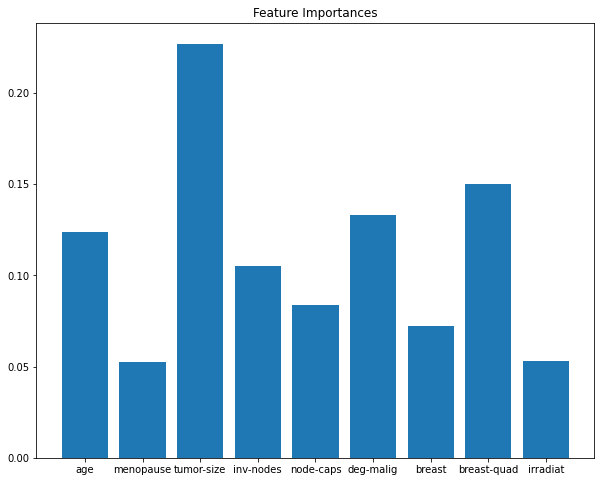

In [4]:
np.random.seed(123123)
selected_features_num = 4
_, __, feature_importances_list = kfold_randomforest(X, y)

# Feature selection from feature importances
selected_features = X_df.columns[sorted(range(X.shape[1]), key=lambda i: np.mean(feature_importances_list, axis=0)[i])[:-selected_features_num-1:-1]]
print('The four most important features are', ", ".join(selected_features[:-1]).upper() + f' and {selected_features[-1].upper()} respectively.')

# Visualize the feature importances
plt.figure(figsize=(10,8))
plt.bar(X_df.columns, np.mean(feature_importances_list, axis=0))
plt.title('Feature Importances')
plt.show()

In [18]:
import os
# Train VQC
def train_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer, \
              seed, \
              X_train, X_test, y_train, y_test, \
              fold_path, \
              positivedata_duplicate_ratio=1, \
              shots=1024,
              randomizer="standard_normal"):

    # Input preparation
    # Input dict
    training_input, test_input = get_input_dict_for_VQC(X_train, X_test, y_train, y_test, positivedata_duplicate_ratio)
    # Quantum instance
    quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=seed, seed_transpiler=seed,optimization_level=3)
    # Final zip file for temp models and its working model_foldername
#     wdir = '/'.join(model_filename.split('/')[:-1])
#     print('='*100 + f'\nWorking model_foldername: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    temp_model_name = os.path.join(fold_path, 'temp.npz')
    final_model_filename = os.path.join(fold_path, 'final_model.npz')

    # Callback function for collecting models' parameters and losses along the way
    training_loss_list, validation_loss_list = [], []
    training_acc, validation_acc = [], []
    def callback_collector(eval_count, model_params, loss, ___, train_acc):
        # Collect training loss
        training_loss_list.append(loss)
        training_acc.append(train_acc)
        
        # Save a temp model
        temp_model_filename = os.path.join(fold_path, f'_evalcount{eval_count+1}.npz')
        np.savez(temp_model_filename, opt_params = model_params)
#         zip_obj.write(temp_model_filename, compress_type=ZIP_DEFLATED)
        # Load the temp model
        vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
        vqc_val.load_model(temp_model_filename)
#         os.remove(temp_model_filename)
        # Collect validation loss
        y_test_prob, y_pred = vqc_val.predict(X_test, quantum_instance)
        val_loss = -np.mean(y_test*np.log(y_test_prob[:,1]) + (1 - y_test)*np.log(y_test_prob[:,0]))
        validation_acc.append(np.mean(y_pred == y_test))
        validation_loss_list.append(val_loss)

    # Run VQC
    vqc = MyVQC(optimizer, feature_map, var_form, training_input, test_input, callback=callback_collector, randomizer=randomizer)
    vqc.random.seed(seed)
    result = vqc.run(quantum_instance)
    clear_output()
    print('Trained successfully!')
    vqc.save_model(final_model_filename)

    # Evaluate a final model
    y_train_pred, y_test_pred = vqc.predict(X_train, quantum_instance)[1], vqc.predict(X_test,  quantum_instance)[1]
    acc_train, f1_train = np.mean(y_train_pred==y_train), f1_score(y_train, y_train_pred)
    acc_test, f1_test = np.mean(y_test_pred==y_test), f1_score(y_test, y_test_pred)
    clear_output()
    print(f'Final accuracy (test set): {acc_test:.2%} | Final accuracy (training set): {acc_train:.2%}')
    print(f'Final F1 score (test set): {f1_test:.2%} | Final F1 score (training set): {f1_train:.2%}')
    print(f'Final model is saved at {final_model_filename}.\nTemp models are saved at {temp_model_name}.')

    result['Training losses'], result['Validation losses'] = np.array(training_loss_list), np.array(validation_loss_list)
    result['Training accuracy logs'], result['Validation accuracy logs'] = np.array(training_acc), np.array(validation_acc)
    result['Training F1 score'], result['Training accuracy'] = f1_train, acc_train
    result['Test F1 score'], result['Test accuracy'] = f1_test, acc_test

    return result

def kfold_vqc(feature_map, \
              var_form, \
              backend, \
              optimizer_generator, \
              seed, \
              X, y, \
              model_foldername, \
              result_filename, \
              k=5, \
              positivedata_duplicate_ratio=1, \
              shots=1024, \
              seed_kfold=123123,
              randomizer="standard_normal"):

    print('='*100)
    print(f'{k}-fold VQC Classification')
#     print('='*100 + f'\nWorking model_foldername: {wdir}\n' + '='*100)
#     os.chdir(wdir)
    print(f"Model is saved at {model_foldername}")
    if not os.path.exists(model_foldername):
        os.makedirs(model_foldername)
    # Final result initialization (dict)
    params_to_collect = ['Training losses', 'Validation losses', \
                         'Training accuracy', 'Test accuracy', \
                         'Training F1 score', 'Test F1 score', \
                         'Training accuracy logs', 'Validation accuracy logs']
    result = {key:[] for key in params_to_collect}
    # result['Default test accuracies'] = [] # Uncomment for validating the predicted accuracy
    np.random.seed(seed_kfold)
    kf = KFold(n_splits=k, shuffle=True)
    kf_id = list(kf.split(X))
    for (fold, (train_id, test_id)) in enumerate(kf_id, start=1):
        fold_path = os.path.join(model_foldername, f"fold_{fold}")
        if not os.path.exists(fold_path):
            os.makedirs(fold_path)
        print('='*100 + f'\nFold number {fold}\n' + '='*100)
        # Split the data
        X_train, X_test, y_train, y_test = X[train_id], X[test_id], y[train_id], y[test_id]
        # Train a model
        optimizer = optimizer_generator()
        result_onefold = train_vqc(feature_map, \
                                var_form, \
                                backend, \
                                optimizer, \
                                seed, \
                                X_train, X_test, y_train, y_test, \
                                fold_path, \
                                positivedata_duplicate_ratio, \
                                shots,
                                  randomizer)
        # Save the trained model to the final zip file
        # Final model
        final_model_filename_fold = os.path.join(fold_path, f"final.npz")
        # Collect results
        for key in params_to_collect:
            result[key].append(result_onefold[key])

    # Average accuracies and f1 scores
    dict_items_without_meanvalues = list(result.items())
    for key, value in dict_items_without_meanvalues:
        result[key + ' (mean)'] = np.mean(value, axis=0)
    # Convert to numpy arrays
    for key, value in result.items():
        if type(value)==list:
            result[key] = np.array(value)
    # Save final results
    with open(result_filename, 'wb') as f:
        pickle.dump(result, f)
    clear_output()
    print('='*100)
    print('='*35 + f' {k}-fold VQC Classification ' + '='*35)
    print(f"Training accuracy (mean): {result['Training accuracy (mean)']:.2%} | Test accuracy (mean): {result['Test accuracy (mean)']:.2%}")
    print(f"Training F1 score (mean): {result['Training F1 score (mean)']:.2%} | Test F1 score (mean): {result['Test F1 score (mean)']:.2%}")
    print(f'All models are saved at {model_foldername}.\nResults are saved at {result_filename}.')
    print('='*100)

    return result

In [ ]:
# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log

# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_standard_4fold_model', \
                    'results/BC_self_learn_encoder_standard_4fold_results.pkl', \
                    k=4,
                    randomizer="standard_normal")

<ipython-input-20-86698fd7cc6d>:14: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
  var_form = MyRYRZ(num_qubit, 4)
2020-08-25 11:27:08,925:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.14.2
Backend: 'qasm_simulator (None)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize', 'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz', 'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer', 'kraus', 'roerror'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': 3}
RunConfig(max_credits=10, seed_simulator=10598, shots=1024)
{'timeout': None}
{}
{}
Measurement mitigation: Non

4-fold VQC Classification
Model is saved at models/BC_self_learn_encoder_standard_4fold_model
Fold number 1


2020-08-25 11:27:14,412:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
<ipython-input-18-7eaa90ed8bbf>:39: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
2020-08-25 11:27:17,162:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:27:23,041:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:27:25,918:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:27:31,820:qiskit.aqua.ut

2020-08-25 11:31:55,684:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:01,567:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:04,364:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:10,398:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:13,358:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:19,472:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:22,226:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:28,224:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:32:31,182:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj val

2020-08-25 11:36:09,224:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 5: 0.7098055
2020-08-25 11:36:09,225:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 5: 0.7080748
2020-08-25 11:36:14,783:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:36:17,468:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:36:23,479:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:36:26,315:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:36:26,615:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 6: 0.6907053
2020-08-25 11:36:26,616:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 6: 0.7196395
2020-08-25 11:36:32,371:qiskit.aqua.utils.run_ci

2020-08-25 11:39:34,982:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:37,709:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:38,008:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 17: 0.7102982
2020-08-25 11:39:38,009:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 17: 0.7099029
2020-08-25 11:39:43,495:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:46,366:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:52,295:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:55,118:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:39:55,420:qiskit.aqua.components.optimizers.spsa

2020-08-25 11:42:54,326:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:42:57,129:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:43:03,056:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:43:05,865:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:43:06,165:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 29: 0.6828576
2020-08-25 11:43:06,167:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 29: 0.6835602
2020-08-25 11:43:11,765:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:43:14,621:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:43:20,429:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-25 11:46:17,492:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 40: 0.6642616
2020-08-25 11:46:17,494:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 40: 0.6558312
2020-08-25 11:46:23,154:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:46:25,945:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:46:31,708:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:46:34,636:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:46:34,935:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 41: 0.6603549
2020-08-25 11:46:34,936:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 41: 0.6758689
2020-08-25 11:46:40,429:qiskit.aqua.utils.ru

2020-08-25 11:49:42,488:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:49:45,261:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:49:45,564:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 52: 0.6342244
2020-08-25 11:49:45,565:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 52: 0.6437843
2020-08-25 11:49:51,083:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:49:53,916:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:49:59,814:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:50:02,650:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:50:02,948:qiskit.aqua.components.optimizers.spsa

2020-08-25 11:53:02,008:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:04,814:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:10,655:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:13,486:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:13,787:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 64: 0.6252436
2020-08-25 11:53:13,789:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 64: 0.6255354
2020-08-25 11:53:19,345:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:22,297:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:53:28,239:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-25 11:56:24,723:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 75: 0.6139761
2020-08-25 11:56:24,724:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 75: 0.6134590
2020-08-25 11:56:30,209:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:56:32,954:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:56:38,704:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:56:41,492:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:56:41,790:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 76: 0.6125425
2020-08-25 11:56:41,791:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 76: 0.6139765
2020-08-25 11:56:47,546:qiskit.aqua.utils.ru

2020-08-25 11:59:49,995:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:59:52,830:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 11:59:53,129:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 87: 0.6066037
2020-08-25 11:59:53,130:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 87: 0.6143073
2020-08-25 11:59:58,663:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:00:01,397:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:00:07,327:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:00:10,342:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:00:10,643:qiskit.aqua.components.optimizers.spsa

2020-08-25 12:03:11,114:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:13,886:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:19,672:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:22,330:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:22,631:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 99: 0.6057604
2020-08-25 12:03:22,632:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 99: 0.6011866
2020-08-25 12:03:28,212:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:31,035:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:03:37,004:qiskit.aqua.utils.run_circuits:INFO: C

2020-08-25 12:06:34,008:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 110: 0.5999715
2020-08-25 12:06:34,009:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 110: 0.6053799
2020-08-25 12:06:39,490:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:06:42,236:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:06:48,070:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:06:50,870:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:06:51,180:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 111: 0.6055881
2020-08-25 12:06:51,181:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 111: 0.6002894
2020-08-25 12:06:56,942:qiskit.aqua.util

2020-08-25 12:09:59,896:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:02,716:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:03,111:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 122: 0.5989548
2020-08-25 12:10:03,112:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 122: 0.5972464
2020-08-25 12:10:08,676:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:11,464:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:17,364:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:20,250:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:10:20,549:qiskit.aqua.components.optimizers.sp

2020-08-25 12:13:21,223:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:23,905:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:29,693:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:32,546:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:32,843:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 134: 0.5888389
2020-08-25 12:13:32,844:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 134: 0.5999162
2020-08-25 12:13:38,543:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:41,347:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:13:47,370:qiskit.aqua.utils.run_circuits:INFO:

2020-08-25 12:16:44,044:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 145: 0.5947730
2020-08-25 12:16:44,045:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 145: 0.5945201
2020-08-25 12:16:49,543:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:16:52,392:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:16:58,375:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:17:01,194:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:17:01,494:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 146: 0.5945929
2020-08-25 12:17:01,495:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 146: 0.5933336
2020-08-25 12:17:07,009:qiskit.aqua.util

2020-08-25 12:20:09,244:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:12,039:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:12,336:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 157: 0.6011353
2020-08-25 12:20:12,337:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 157: 0.5999529
2020-08-25 12:20:17,923:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:20,717:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:26,608:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:29,323:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:20:29,620:qiskit.aqua.components.optimizers.sp

2020-08-25 12:23:28,523:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:31,265:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:37,067:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:39,913:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:40,223:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 169: 0.5928924
2020-08-25 12:23:40,224:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 169: 0.5919146
2020-08-25 12:23:45,884:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:48,626:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:23:54,446:qiskit.aqua.utils.run_circuits:INFO:

2020-08-25 12:26:49,831:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 180: 0.5874204
2020-08-25 12:26:49,832:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 180: 0.5906499
2020-08-25 12:26:55,335:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:26:58,174:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:27:03,934:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:27:06,753:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:27:07,051:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 181: 0.5905006
2020-08-25 12:27:07,052:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 181: 0.5900961
2020-08-25 12:27:12,777:qiskit.aqua.util

2020-08-25 12:30:15,309:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:18,211:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:18,511:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 192: 0.5890531
2020-08-25 12:30:18,512:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 192: 0.5884308
2020-08-25 12:30:24,110:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:26,898:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:32,703:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:35,568:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:30:35,864:qiskit.aqua.components.optimizers.sp

2020-08-25 12:33:34,398:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:33:37,279:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:33:43,147:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:33:45,986:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:33:46,287:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 204: 0.5883936
2020-08-25 12:33:46,288:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 204: 0.5873726
2020-08-25 12:33:51,772:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:33:54,713:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:34:00,522:qiskit.aqua.utils.run_circuits:INFO:

2020-08-25 12:36:57,339:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 215: 0.5854337
2020-08-25 12:36:57,340:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 215: 0.5875832
2020-08-25 12:37:02,933:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:37:05,839:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:37:11,689:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:37:14,495:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:37:14,795:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 216: 0.5895999
2020-08-25 12:37:14,796:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 216: 0.5851252
2020-08-25 12:37:20,305:qiskit.aqua.util

2020-08-25 12:40:22,255:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:25,136:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:25,432:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 227: 0.5838697
2020-08-25 12:40:25,433:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 227: 0.5862494
2020-08-25 12:40:30,959:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:33,853:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:39,638:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:42,478:qiskit.aqua.utils.run_circuits:INFO: Can't skip qobj validation for the NoneType provider.
2020-08-25 12:40:42,776:qiskit.aqua.components.optimizers.sp

In [ ]:
mean_epoch = result['Training losses (mean)'][-600:]
std_epoch = result['Training losses'].std(0)[-600:]
plt.plot(mean_epoch)
plt.fill_between(np.arange(len(mean_epoch)), mean_epoch - std_epoch, mean_epoch + std_epoch,color='orange')

In [73]:
with open('results/bc_qrac_record.pk', 'rb') as f:
    prev_result = pickle.load(f)

In [75]:
prev_result['acc_f1s_test']

[(0.6551724137931034, 0.4117647058823529),
 (0.7719298245614035, 0.6060606060606061),
 (0.6842105263157895, 0.47058823529411764),
 (0.631578947368421, 0.46153846153846156),
 (0.7719298245614035, 0.6486486486486486)]

In [76]:
prev_result['acc_f1s_train']

[(0.7236842105263158, 0.5655172413793104),
 (0.7030567685589519, 0.5211267605633804),
 (0.7336244541484717, 0.5611510791366906),
 (0.7248908296943232, 0.5467625899280576),
 (0.7336244541484717, 0.5547445255474452)]

In [13]:


# Preparing data
X, y = X_df[selected_features].values, y_df.values
X_binary_encoded = binary_encoder(X)

# Preparing inputs for feeding VQC
num_qubit = len(X_binary_encoded[0])//3
# Custom Feature Map
feature_map = QuantumCircuit(num_qubit)
var_form = MyRYRZ(num_qubit, 4)
backend = QasmSimulator({"method": "statevector_gpu"})

# Test Run VQC (CustomFeatureMap)
seed, epoch = 10598, 300
optimizer = lambda: SPSA(epoch)
result2 = kfold_vqc(feature_map, \
                    var_form, \
                    backend, \
                    optimizer, \
                    seed, \
                    X_binary_encoded, y, \
                    'models/BC_self_learn_encoder_uniform_4fold_model.zip', \
                    'results/BC_self_learn_encoder_uniform_4fold_results.pkl', \
                    k=4,
                    randomizer="uniform")

<ipython-input-13-c8311a189613>:9: DeprecationWarning: The qiskit.aqua.components.variational_forms.RYRZ object is deprecated as of 0.7.0 and will be removed no sooner than 3 months after the release. You should use qiskit.circuit.library.EfficientSU2 (uses CX entangling) or qiskit.circuit.library.TwoLocal instead.
  var_form = MyRYRZ(num_qubit, 4)
<ipython-input-5-dab6c793eb93>:49: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc = MyVQC(optimizer, feature_map, var_form, training_input, test_input, callback=callback_collector, randomizer=randomizer)


4-fold VQC Classification
Model is saved at models/BC_self_learn_encoder_uniform_4fold_model.zip
Fold number 1


<ipython-input-5-dab6c793eb93>:39: DeprecationWarning: 
            The <class 'qiskit.circuit.quantumcircuit.QuantumCircuit'> object as input for the VQC is deprecated as of 0.7.0 and will
            be removed no earlier than 3 months after the release.
            You should pass a QuantumCircuit object instead.
            See also qiskit.circuit.library.n_local for a collection
            of suitable circuits.
  vqc_val = MyVQC(optimizer, feature_map, var_form, training_input, test_input)
Process ForkProcess-190666:
Traceback (most recent call last):
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/napat-nii/.pyenv/versions/3.8.0/lib/python3.8/concurrent/futures/process.py", line 233, in _process_worker
    call_item = call_queue.get(bloc

QiskitError: 'Keyboard interrupt in parallel_map.'